# Учимся работе с данными - от загрузки до моделирования

## Загружаем датасет

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [11]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df = df.drop(columns=["id"])
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


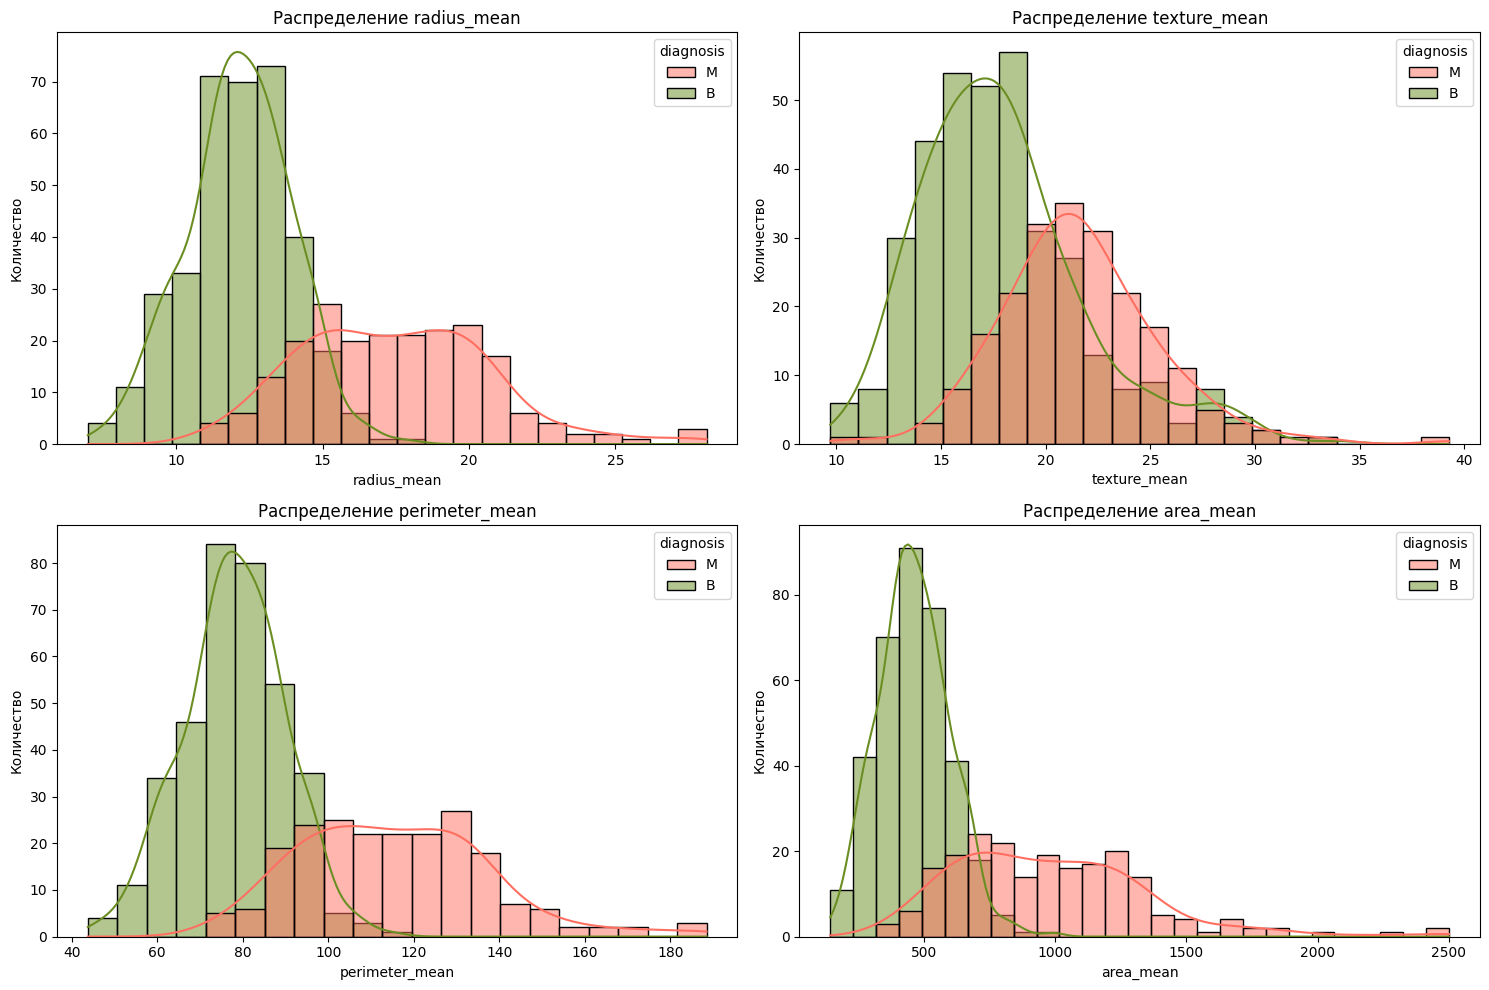

In [13]:
# Посмотрим на распределение radius_mean, texture_mean, perimeter_mean, area_mean в зависимости от типа целевой переменной (diagnosis)
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, hue="diagnosis", kde=True, palette=["#FF6F61", "#6B8E23"])
    plt.title(f"Распределение {feature}")
    plt.xlabel(feature)
    plt.ylabel("Количество")

plt.tight_layout()
plt.show()

Heatmap для матриц корреляций

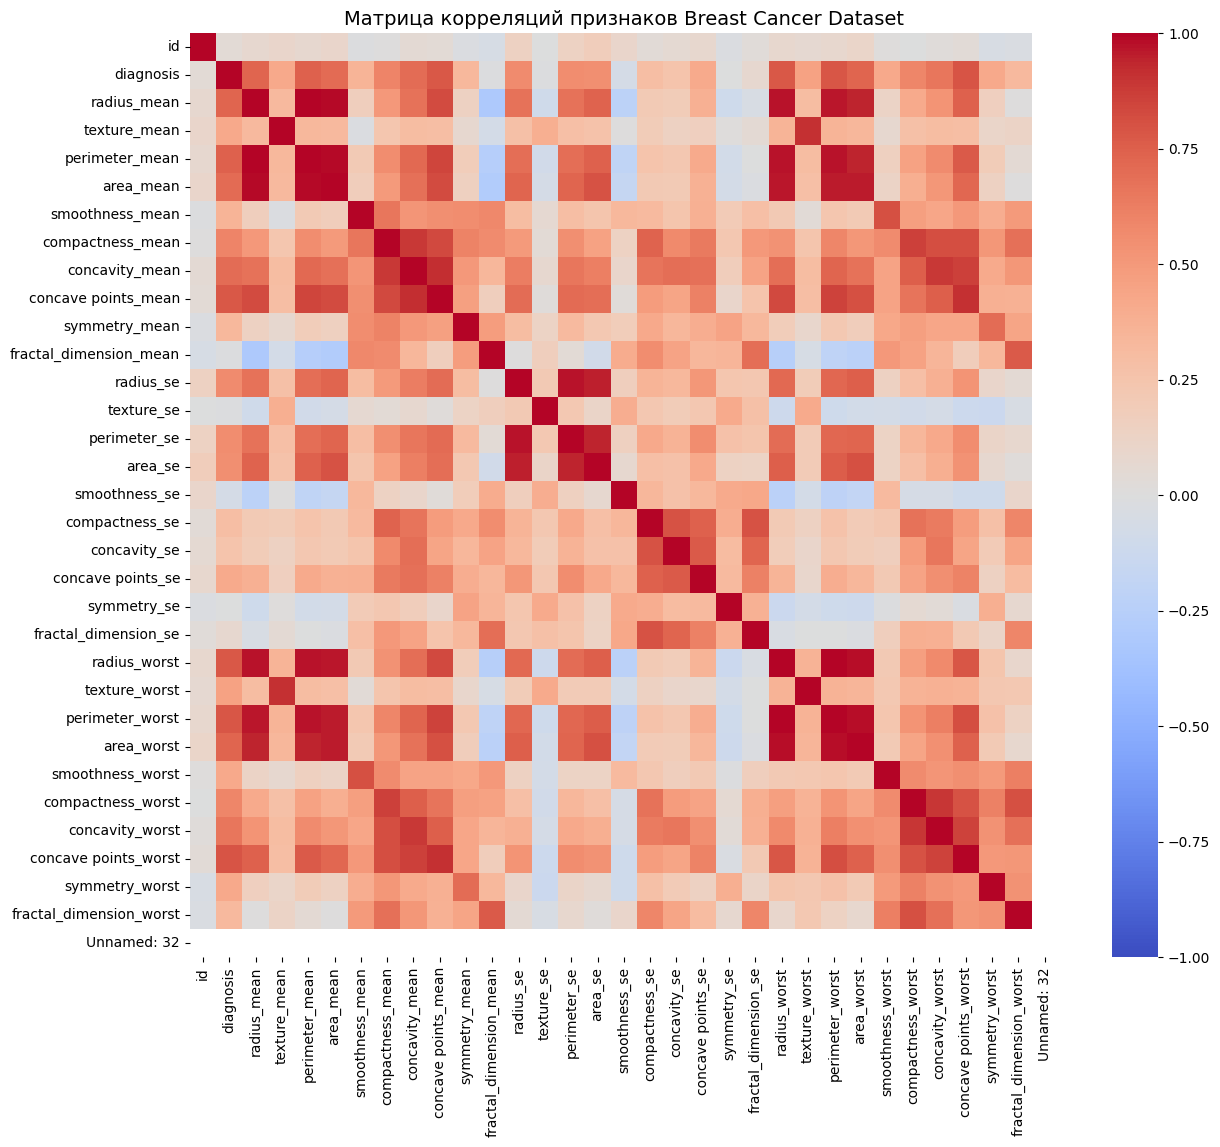

In [14]:
# Преобразуем диагноз в числовой вид (для корреляции)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Вычисляем матрицу корреляций
corr = df.corr()

# Размер фигуры для heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляций признаков Breast Cancer Dataset", fontsize=14)
plt.show()

**radius**, **perimeter**, ***area*** — геометрически связаны между собой;

***compactness*** и **concavity** — оба описывают форму границ опухоли, поэтому тоже коррелируют.

In [ ]:
Построим  для сильно скоррелированных признаков попарные scatterplot-ы

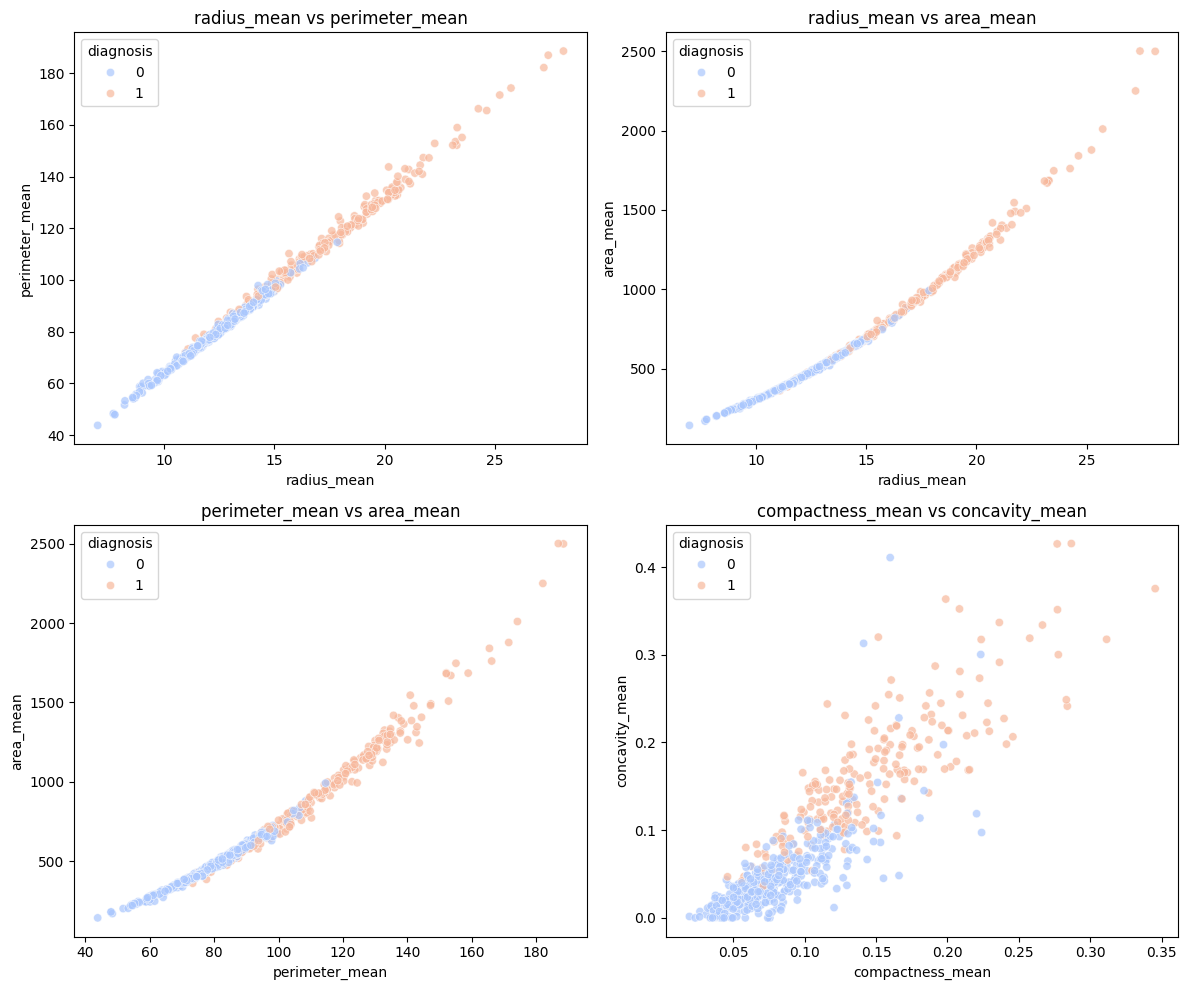

In [15]:
# Список сильно коррелированных пар
strong_pairs = [
    ("radius_mean", "perimeter_mean"),
    ("radius_mean", "area_mean"),
    ("perimeter_mean", "area_mean"),
    ("compactness_mean", "concavity_mean")
]

plt.figure(figsize=(12, 10))

for i, (x_col, y_col) in enumerate(strong_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=x_col, y=y_col, hue="diagnosis", palette="coolwarm", alpha=0.7)
    plt.title(f"{x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()

6) Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных

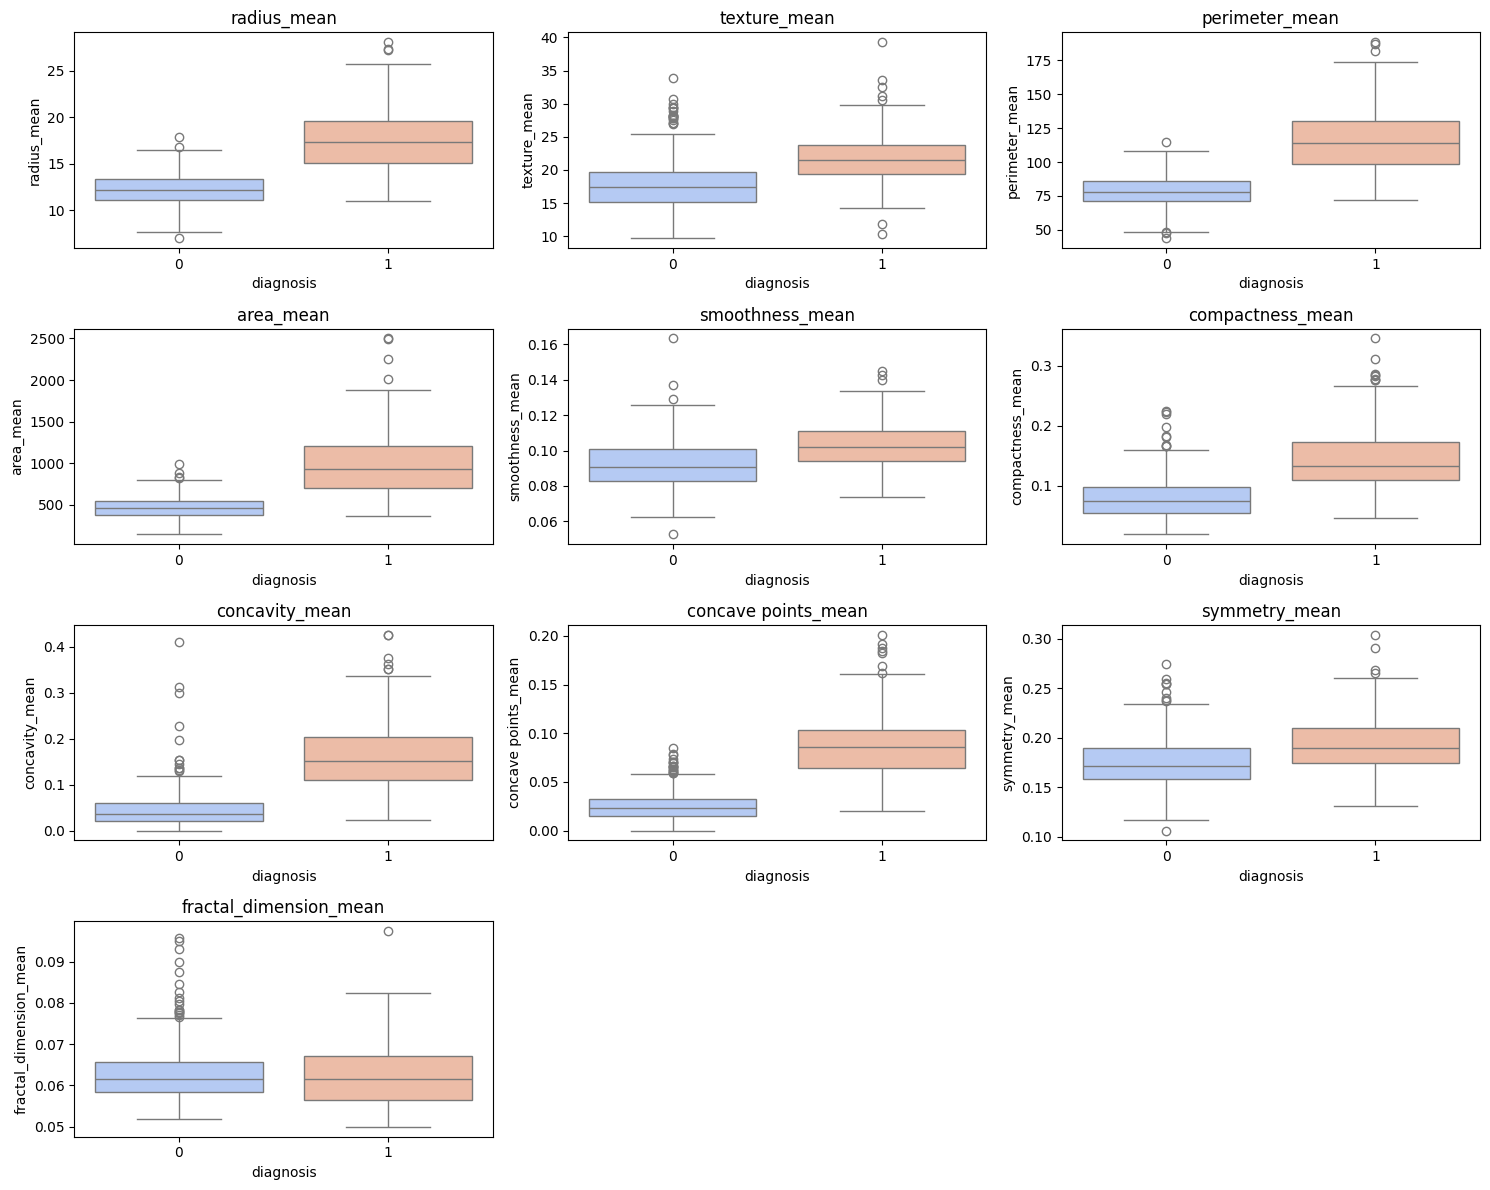

In [17]:
# Список признаков для анализа
features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x='diagnosis', y=col, hue='diagnosis', palette='coolwarm', legend=False)
    plt.title(col)

plt.tight_layout()
plt.show()